## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

from fbprophet import Prophet

In [38]:
global coeff
coeff = .01

## Import data

In [39]:
filename = 'data/london_smartmeter_basic.csv'
df = pd.read_csv(filename)

In [40]:
df['day'] = pd.to_datetime(df['day'])

In [41]:
df.head()

,day,consumption,evaluation_set
0,2011-11-24,7.7580,False
1,2011-11-25,8.7385,False
2,2011-11-26,9.4770,False
3,2011-11-27,9.8030,False
4,2011-11-28,7.0690,False


## Data Exploration

In [42]:
df['weekday'] = df['day'].dt.dayofweek

In [43]:
flag = df['evaluation_set']
df_train = df[~flag][['day', 'consumption', 'weekday']]

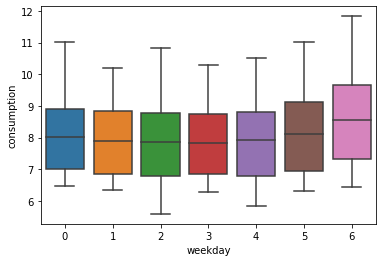

In [44]:
sns.boxplot(x='weekday', y='consumption', data=df_train)

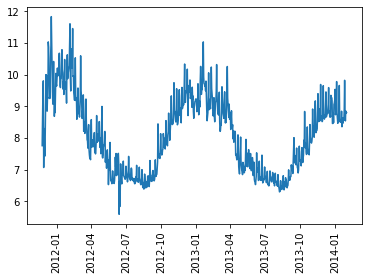

In [45]:
plt.plot(df_train['day'], df_train['consumption'])
plt.xticks(rotation=90)
plt.show()

## Preprocessing

In [46]:
flag = df['evaluation_set']
ts = df[~flag][['day', 'consumption']]
ts_eval = df[flag][['day', 'consumption']]

In [47]:
# transform consumption so that diff normal distribution
ts['transf_consumption'] = ts['consumption']**coeff

## Train

In [48]:
dat = pd.DataFrame()
dat['ds'] = ts['day'].values
dat['y'] = ts['transf_consumption'].values

In [49]:
model = Prophet(daily_seasonality=0)
model.fit(dat)

## Predict training set

In [50]:
df_dates = model.make_future_dataframe(periods=0, include_history=True)

In [51]:
model_prediction = model.predict(df_dates)

In [52]:
y_pred = model_prediction[['ds', 'yhat']]
y_pred = y_pred.set_index('ds')

In [53]:
diff = y_pred['yhat'].values - dat['y']
mape = np.mean(abs(diff/dat['y']))
mape

0.0002556470882398974

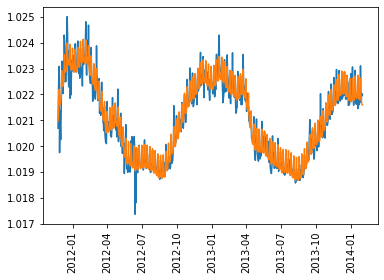

In [54]:
plt.plot(ts['day'], ts['transf_consumption'])
plt.plot(ts['day'], y_pred['yhat'])
plt.xticks(rotation=90)
plt.show()

In [55]:
diff2 = y_pred['yhat'].values**(1/coeff) - ts['consumption']
mape = np.mean(abs(diff2/ts['consumption']))
mape

0.025593717257741844

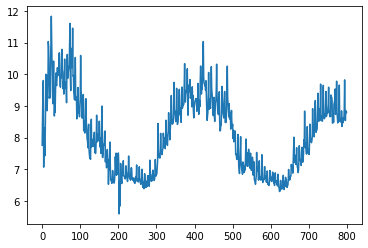

In [56]:
plt.plot(ts['consumption'])